In [1]:
import pandas as pd
import re
import sqlite3
import numpy as np
import pandas_profiling



conn = sqlite3.connect("sqlite/realty.db")
realty_details_df = pd.read_sql_query('select * from realties;', conn)
conn.close()
realty_details_df.head()


duplicates = sum(realty_details_df.duplicated())
if duplicates > 0:
    print('Found', duplicates, 'duplicates.')
    realty_details_df = realty_details_df.drop_duplicates()
    print(len(realty_details_df), 'unique rows left.')
    print('Writing unique results to DB.')
    conn = sqlite3.connect("sqlite/realty.db")
    realty_details_df.to_sql('realties', conn, if_exists ='replace')
    conn.close()
    print('done.')

In [2]:
#######################################
# clean & convert data
#######################################


non_decimal = re.compile(r'[^\d.]+')


realty_details_df.year_built = realty_details_df.year_built.replace('', '0')
realty_details_df.year_built = realty_details_df.year_built.apply(lambda x: non_decimal.sub('', str(x).replace(',','.')))
realty_details_df.square_m = realty_details_df.square_m.apply(lambda x: non_decimal.sub('', str(x).replace(',','.')))
realty_details_df.num_rooms = realty_details_df.num_rooms.apply(lambda x: non_decimal.sub('', str(x).replace(',','.')))
realty_details_df.storage_m = realty_details_df.storage_m.apply(lambda x: non_decimal.sub('', str(x).replace(',','.')))
realty_details_df.last_refurb = realty_details_df.last_refurb.apply(lambda x: non_decimal.sub('', str(x).replace(',','.')))
realty_details_df.energy_consumption = realty_details_df.energy_consumption.apply(lambda x: non_decimal.sub('', str(x).replace(',','.')))
realty_details_df.net_rent = realty_details_df.net_rent.apply(lambda x: non_decimal.sub('', str(x).replace('.','').replace(',','.')))
realty_details_df.gross_rent = realty_details_df.gross_rent.apply(lambda x: non_decimal.sub('', str(x).replace('.','').replace(',','.')))
realty_details_df.floor = realty_details_df.floor.apply(lambda x: str(x).split()[0])


realty_details_df = realty_details_df.replace('0', realty_details_df.replace(['0'], [None]))
realty_details_df = realty_details_df.replace(0, realty_details_df.replace([0], [None]))


# make numeric
#######################################

cols = ['id', 'square_m', 'storage_m',  'num_rooms', 'num_bedrooms', 'num_baths', 'num_carparks', 'year_built', 'last_refurb', 'energy_consumption','net_rent', 'gross_rent']
realty_details_df[cols] = realty_details_df[cols].apply(pd.to_numeric, errors='ignore')
realty_details_df.scraped_ts = pd.to_datetime(realty_details_df.scraped_ts)




print(realty_details_df.dtypes)

realty_details_df.head()

level_0                      float64
index                        float64
id                             int64
city_county                   object
city_quarter                  object
street                        object
title                         object
realty_type                   object
floor                         object
square_m                     float64
storage_m                    float64
num_rooms                    float64
num_bedrooms                 float64
num_baths                    float64
num_carparks                 float64
year_built                   float64
last_refurb                  float64
quality                       object
heating_type                  object
fuel_type                     object
energy_consumption           float64
energy_class                  object
net_rent                     float64
gross_rent                   float64
scraped_ts            datetime64[ns]
dtype: object


,level_0,index,id,city_county,city_quarter,street,title,realty_type,floor,square_m,...,year_built,last_refurb,quality,heating_type,fuel_type,energy_consumption,energy_class,net_rent,gross_rent,scraped_ts
0,NaN,NaN,110713974,Hamburg,Altona-Nord,Glückel-von-Hameln-Straße 2,neue Wohnung - neues Glück,Etagenwohnung,None,75.14,...,2019.0,NaN,None,None,None,NaN,None,1150.0,1370.66,2019-05-09 20:02:05.576285
1,1.0,1.0,110714010,Hamburg,Altona-Nord,Susanne-von-Paczensky-Straße 9,Grandiose 4-Zimmerwohung! ***Erstbezug***,Etagenwohnung,None,99.39,...,2019.0,NaN,None,None,None,NaN,None,1440.0,1828.13,2019-05-09 20:02:05.952150
2,2.0,2.0,110247048,Hamburg,Altona-Nord,Susanne-von-Paczensky-Straße 7,Traumhafte Penthousewohnung! ***Erstbezug***,Etagenwohnung,None,166.02,...,2019.0,NaN,None,None,None,NaN,None,2500.0,3090.15,2019-05-09 20:01:52.972958
3,3.0,3.0,110247042,Hamburg,Altona-Nord,Susanne-von-Paczensky-Straße 11,Geniale 3-Zimmerwohnung! ***Erstbezug***,Etagenwohnung,None,97.65,...,2019.0,NaN,None,None,None,NaN,None,1470.0,1854.57,2019-05-09 20:01:52.835853
4,4.0,4.0,110714047,Hamburg,Altona-Nord,Eva-Rühmkorf-Straße 8,***Hervorragende 3-Zimmerwohnung*** Erstbezug!,Etagenwohnung,None,86.04,...,2019.0,NaN,None,None,None,NaN,None,1300.0,1648.85,2019-05-09 20:01:52.821486


In [3]:
#######################################
# Make Data Profiling Report
#######################################



pandas_profiling.ProfileReport(realty_details_df)

Number of variables,25
Number of observations,2335
Total Missing (%),23.2%
Total size in memory,456.1 KiB
Average record size in memory,200.0 B
Numeric,14
Categorical,10
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [11]:
plot_data = realty_details_df[['city_county', 'city_quarter', 'street',
       'title', 'realty_type', 'floor', 'square_m', 'storage_m', 'num_rooms',
       'num_bedrooms', 'num_baths', 'num_carparks', 'year_built',
       'last_refurb', 'quality', 'heating_type', 'fuel_type',
       'energy_consumption', 'energy_class', 'net_rent', 'gross_rent']]


,square_m,storage_m,num_rooms,num_bedrooms,num_baths,num_carparks,year_built,last_refurb,energy_consumption,net_rent,gross_rent
square_m,1.000000,0.315832,0.808466,0.636019,0.572631,0.048099,0.047896,-0.038966,-0.158855,0.042558,0.834466
storage_m,0.315832,1.000000,0.340055,0.237797,0.099694,0.023299,-0.136399,-0.057848,0.250081,0.167909,0.288231
num_rooms,0.808466,0.340055,1.000000,0.788382,0.439384,0.087582,-0.029043,0.024223,-0.051553,0.041722,0.631696
num_bedrooms,0.636019,0.237797,0.788382,1.000000,0.396852,0.066019,-0.015258,-0.012405,-0.005823,-0.003331,0.473505
num_baths,0.572631,0.099694,0.439384,0.396852,1.000000,0.091911,0.052829,0.029942,-0.091525,-0.042997,0.544463
num_carparks,0.048099,0.023299,0.087582,0.066019,0.091911,1.000000,-0.029812,0.047581,-0.045087,-0.027490,0.044462
year_built,0.047896,-0.136399,-0.029043,-0.015258,0.052829,-0.029812,1.000000,0.064525,-0.761648,0.084919,0.039924
last_refurb,-0.038966,-0.057848,0.024223,-0.012405,0.029942,0.047581,0.064525,1.000000,-0.109085,-0.041102,0.024125
energy_consumption,-0.158855,0.250081,-0.051553,-0.005823,-0.091525,-0.045087,-0.761648,-0.109085,1.000000,-0.150911,-0.231203
net_rent,0.042558,0.167909,0.041722,-0.003331,-0.042997,-0.027490,0.084919,-0.041102,-0.150911,1.000000,0.088556


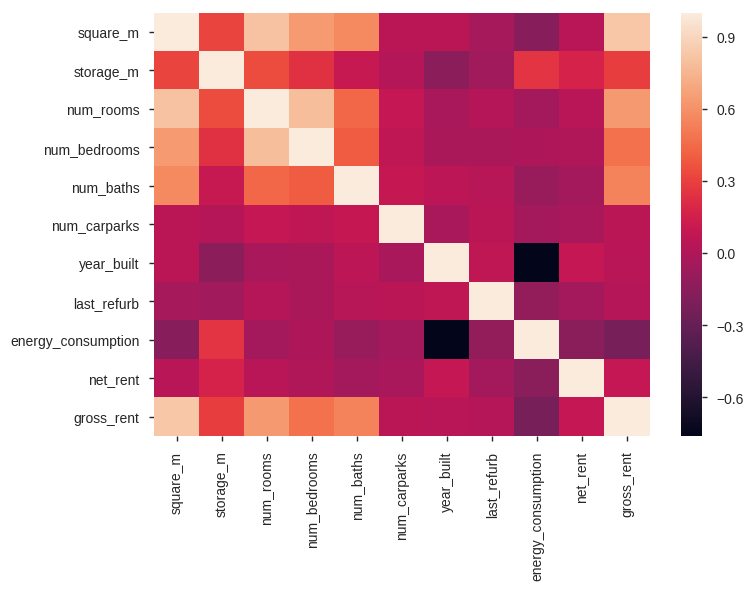

In [8]:
import seaborn as sns



corr = plot_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

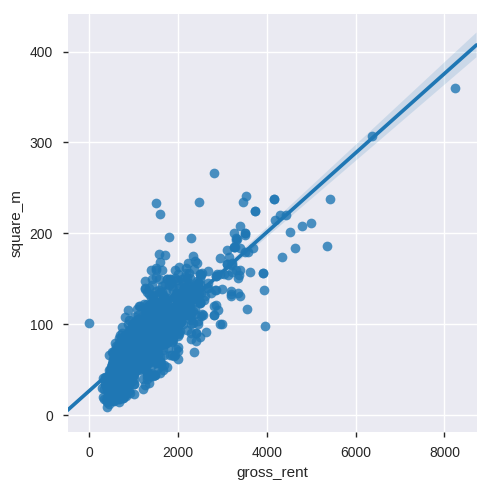

In [18]:
sns.lmplot(x="gross_rent", y="square_m", data=plot_data[['gross_rent', 'square_m']])

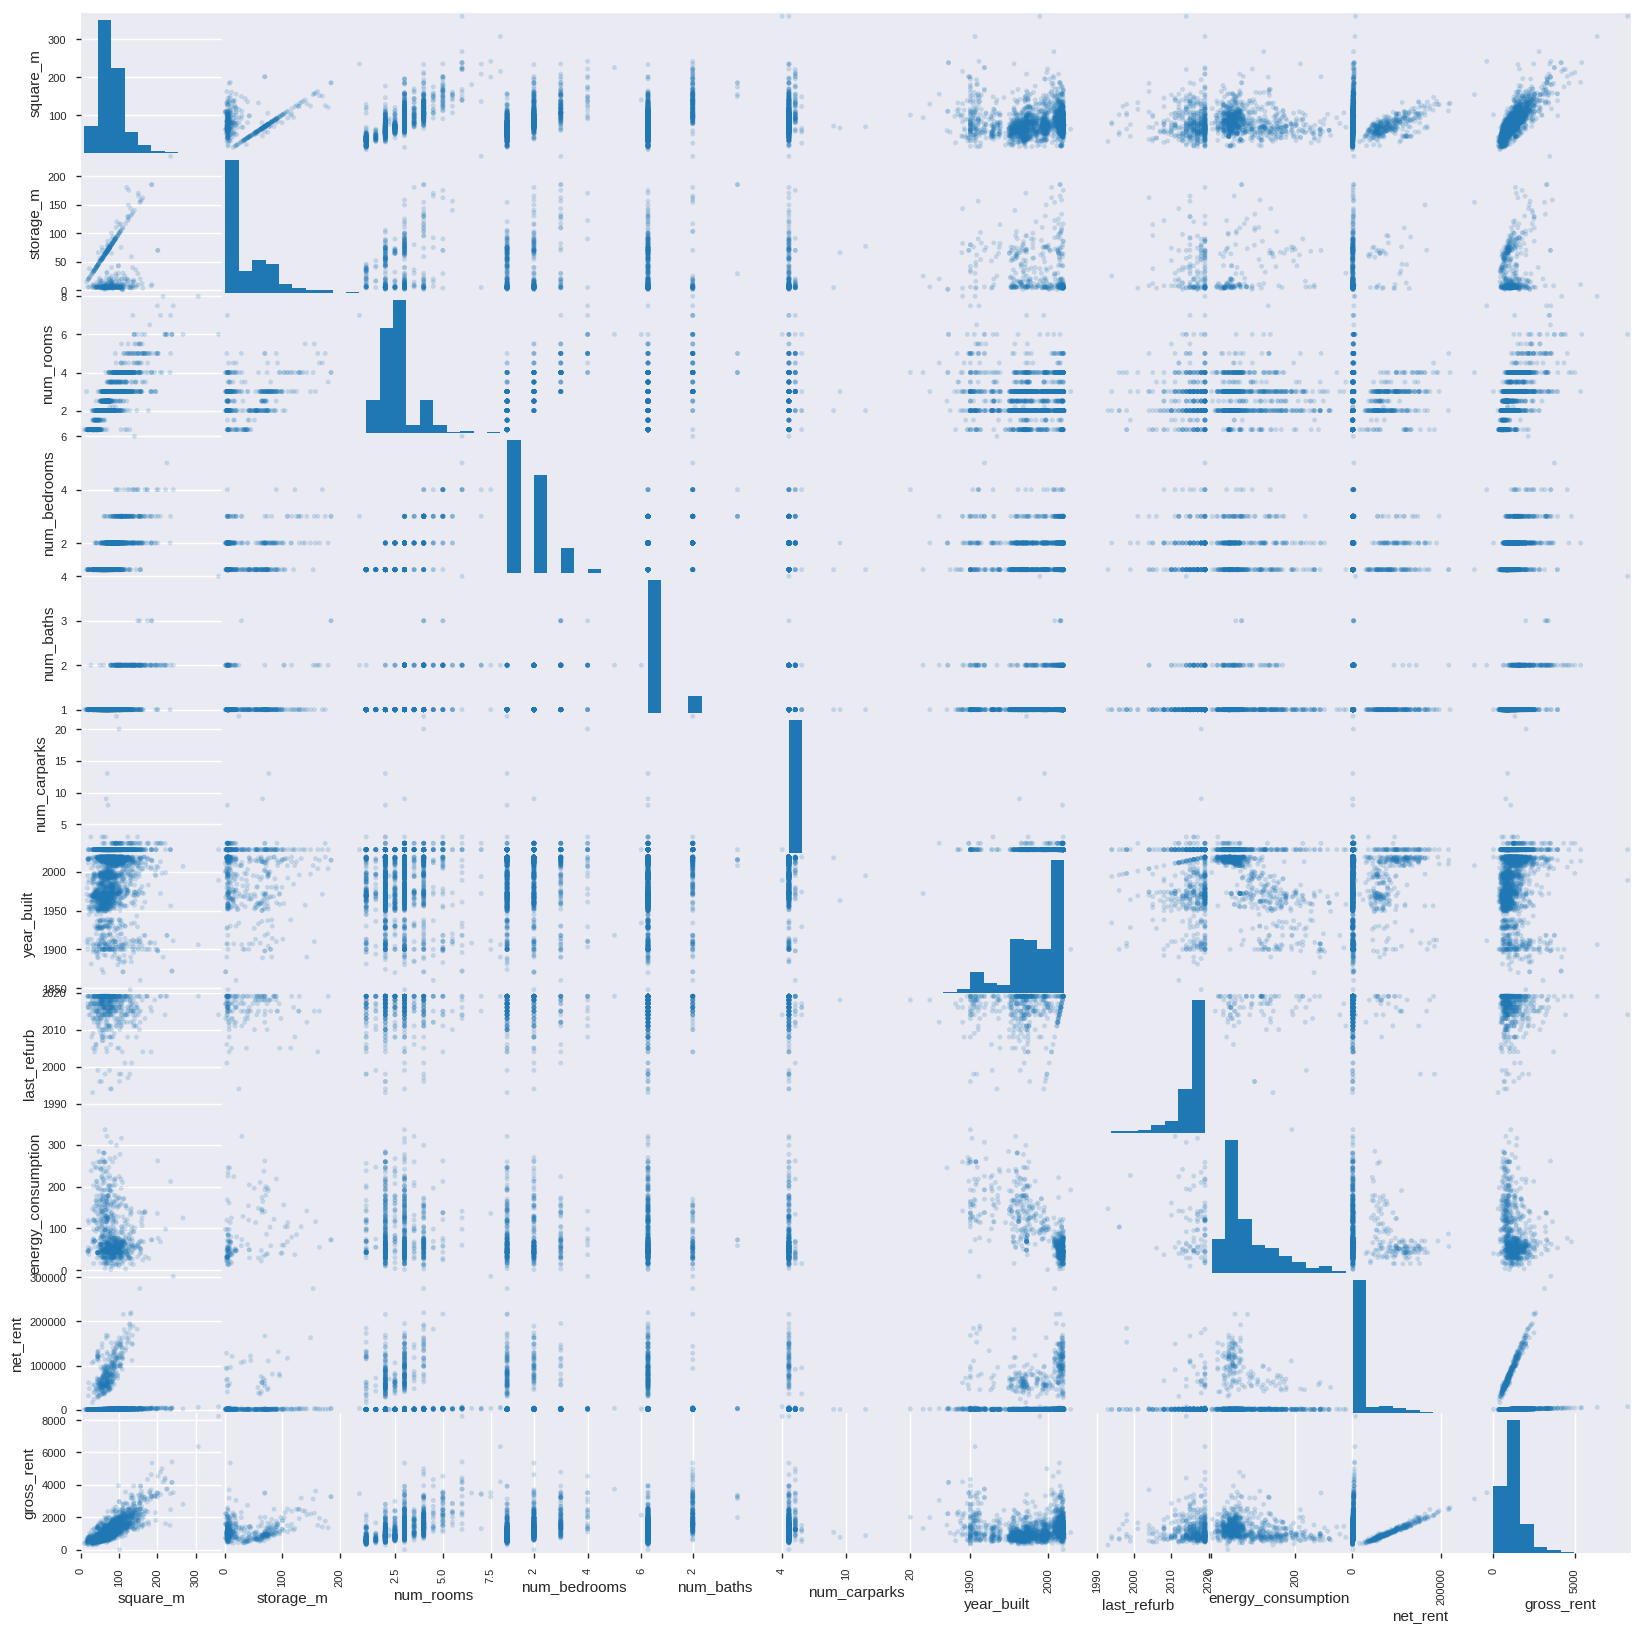

In [31]:
from pandas.plotting import scatter_matrix


x = scatter_matrix(plot_data, alpha=0.2, figsize=(20, 20), diagonal='hist')

In [29]:
plot_data

,city_county,city_quarter,street,title,realty_type,floor,square_m,storage_m,num_rooms,num_bedrooms,...,num_carparks,year_built,last_refurb,quality,heating_type,fuel_type,energy_consumption,energy_class,net_rent,gross_rent
0,Hamburg,Altona-Nord,Glückel-von-Hameln-Straße 2,neue Wohnung - neues Glück,Etagenwohnung,None,75.14,NaN,2.0,NaN,...,NaN,2019.0,NaN,None,None,None,NaN,None,1150.0,1370.66
1,Hamburg,Altona-Nord,Susanne-von-Paczensky-Straße 9,Grandiose 4-Zimmerwohung! ***Erstbezug***,Etagenwohnung,None,99.39,NaN,4.0,NaN,...,NaN,2019.0,NaN,None,None,None,NaN,None,1440.0,1828.13
2,Hamburg,Altona-Nord,Susanne-von-Paczensky-Straße 7,Traumhafte Penthousewohnung! ***Erstbezug***,Etagenwohnung,None,166.02,NaN,5.0,NaN,...,NaN,2019.0,NaN,None,None,None,NaN,None,2500.0,3090.15
3,Hamburg,Altona-Nord,Susanne-von-Paczensky-Straße 11,Geniale 3-Zimmerwohnung! ***Erstbezug***,Etagenwohnung,None,97.65,NaN,3.0,NaN,...,NaN,2019.0,NaN,None,None,None,NaN,None,1470.0,1854.57
4,Hamburg,Altona-Nord,Eva-Rühmkorf-Straße 8,***Hervorragende 3-Zimmerwohnung*** Erstbezug!,Etagenwohnung,None,86.04,NaN,3.0,NaN,...,NaN,2019.0,NaN,None,None,None,NaN,None,1300.0,1648.85
5,Hamburg,Bramfeld,Bramfelder Dorfplatz 8,**Erstbezug** Maisonettewohnung mit Terrasse u...,Etagenwohnung,None,120.89,NaN,4.0,NaN,...,1.0,2018.0,NaN,None,None,None,50.60,None,151113.0,1943.05
6,Hamburg,Rahlstedt,Rahlstedter Straße 2c,Traumhafte 3-Zimmerwohnung mit Dachterrasse un...,Etagenwohnung,None,103.32,NaN,3.0,NaN,...,1.0,2013.0,NaN,None,None,None,52.20,None,104037.0,1398.37
7,Hamburg,Rahlstedt,Rahlstedter Straße 187,Exklusive Wohnung mit Dachterrasse und Winterg...,Etagenwohnung,None,134.32,NaN,3.0,2.0,...,1.0,2013.0,NaN,Gehobene Qualität,None,Fernwärme,57.90,None,148804.0,1970.04
8,Pinneberg (Kreis),Schenefeld,Sülldorfer Weg 18,Schenefeld: Exklusive 3 Zimmer- Staffelgeschoß...,Dachgeschoss,2,116.11,NaN,3.0,NaN,...,1.0,2014.0,2014.0,Gehobene Qualität,Zentralheizung,Gas,45.87,None,1219.0,1484.00
9,Hamburg,Barmbek-Süd,Levisohnweg 7,Sonne bis in die Abendstunden - große Dachterr...,Etagenwohnung,4,109.08,NaN,3.0,1.0,...,NaN,2015.0,NaN,Gehobene Qualität,Fernwärme,Fernwärme,57.80,B,1778.0,2116.15
